In [16]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = - np.pi
b = np.pi


def u(x):
    return np.sin(x * 2 * np.pi / (b - a))


def f(x):
    return ((2 * np.pi / (b - a)) ** 2 + 1) * np.sin(x * 2 * np.pi / (b - a))


In [17]:
# Parameters
d = 1
k = 1
levels = 5
start_ncentres = 15
start_delta = 2.

# Computed parameters
phi = rad.phi_factory(d, k)
thinning = 2. ** np.arange(0, levels)
centres = [np.arange(a, b + inc, inc) for inc in (b - a) / (thinning * start_ncentres)]
delta = start_delta / thinning

# Integration
integrator = rad.integrate.TrapezoidIntegrator(a, b, 3000)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
approx, data = rad.multilevel.solve(f, centres, delta, phi, rad.helmholtz.solve, integrator)
error = rad.error(u, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Numbers:")
for i, datum in enumerate(data, 1):
    cond = datum[0]
    print(f"  Level {i}:", cond)

L2 Relative Error: 0.2718934467762712
Condition Numbers:
  Level 1: 313.56702127468054
  Level 2: 177.3414508288501
  Level 3: 266.95736870710925
  Level 4: 478.77388863882
  Level 5: 1055.4294198551138


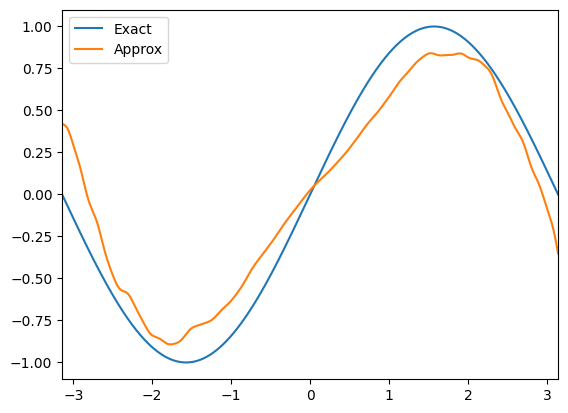

In [18]:
rad.plot.many(a, b, u, approx, labels=["Exact", "Approx"])

In [19]:
from IPython.display import HTML


anim = rad.animate.ml_animate(u, approx, a, b)
HTML(anim.to_jshtml())

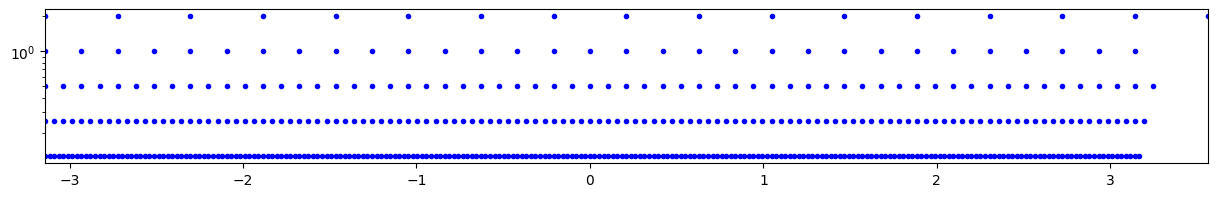

In [20]:
rad.plot.thinning(centres, delta, figsize=(15, 2))